<a href="https://colab.research.google.com/github/aarondelgiudice/thinkful_data_bootcamp/blob/master/unit_7/exam/takehome_customer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


## Load Data

In [2]:
url = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/customers_data.csv"
df = pd.read_csv(url, index_col=0)

print(df.shape)
print(df.dropna().shape)
df.head()

(120000, 6)
(120000, 6)


,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,male,no,31.0,35.0,False
1,65.16,male,yes,23.0,61.0,False
2,40.60,female,no,36.0,49.0,False
3,38.01,male,yes,47.0,57.0,False
4,22.32,female,yes,5.0,39.0,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 0 to 119999
Data columns (total 6 columns):
purch_amt                120000 non-null float64
gender                   120000 non-null object
card_on_file             120000 non-null object
age                      120000 non-null float64
days_since_last_purch    120000 non-null float64
loyalty                  120000 non-null bool
dtypes: bool(1), float64(3), object(2)
memory usage: 5.6+ MB


In [4]:
df.describe()

,purch_amt,age,days_since_last_purch
count,120000.000000,120000.000000,120000.000000
mean,44.036234,25.803008,56.605908
std,20.473148,10.153072,16.422187
min,-43.950000,-22.000000,-9.000000
25%,30.210000,19.000000,45.000000
50%,43.970000,26.000000,57.000000
75%,57.830000,33.000000,68.000000
max,142.200000,71.000000,125.000000


### Clean Data

In [4]:
# convert loyalty boolean to numeric
df["loyalty"] = df["loyalty"].astype(int)
df.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,male,no,31.0,35.0,0
1,65.16,male,yes,23.0,61.0,0
2,40.60,female,no,36.0,49.0,0
3,38.01,male,yes,47.0,57.0,0
4,22.32,female,yes,5.0,39.0,0


In [5]:
# convert gender to numeric
df["gender"] = np.where(df["gender"]=="male",0,1)

#convert card_on_file to numeric
df["card_on_file"] = np.where(df["card_on_file"]=="no",0,1)

df.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,0,0,31.0,35.0,0
1,65.16,0,1,23.0,61.0,0
2,40.60,1,0,36.0,49.0,0
3,38.01,0,1,47.0,57.0,0
4,22.32,1,1,5.0,39.0,0


## EDA

Target variable distribution: 0.16666666666666666


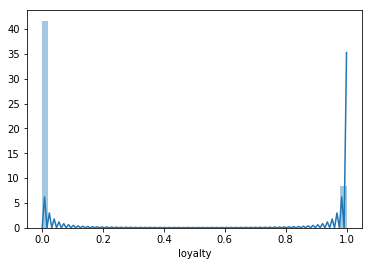

In [33]:
sns.distplot(df["loyalty"]);

print("Target variable distribution: {}%".format(df["loyalty"].sum()/len(df)))

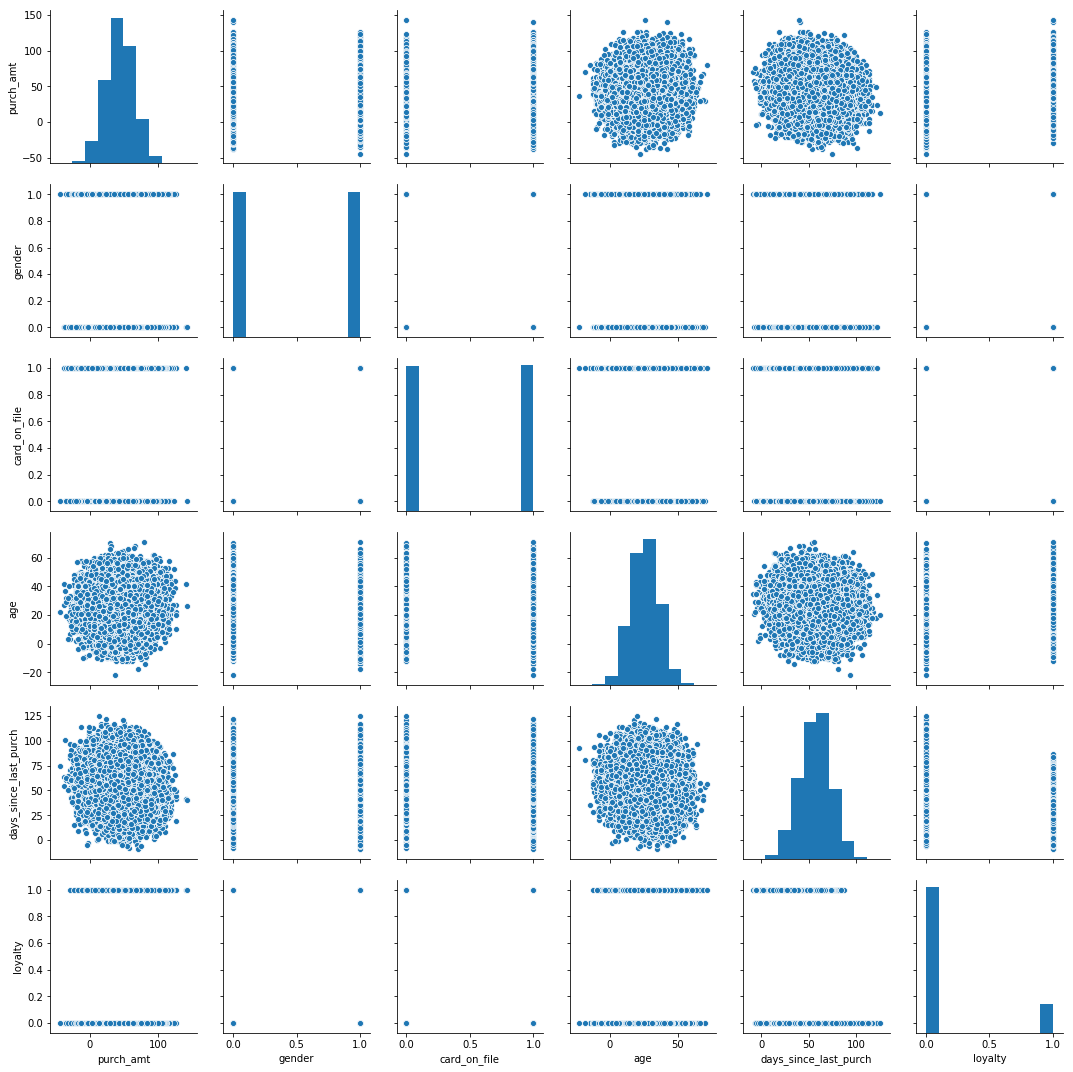

In [22]:
sns.pairplot(df);

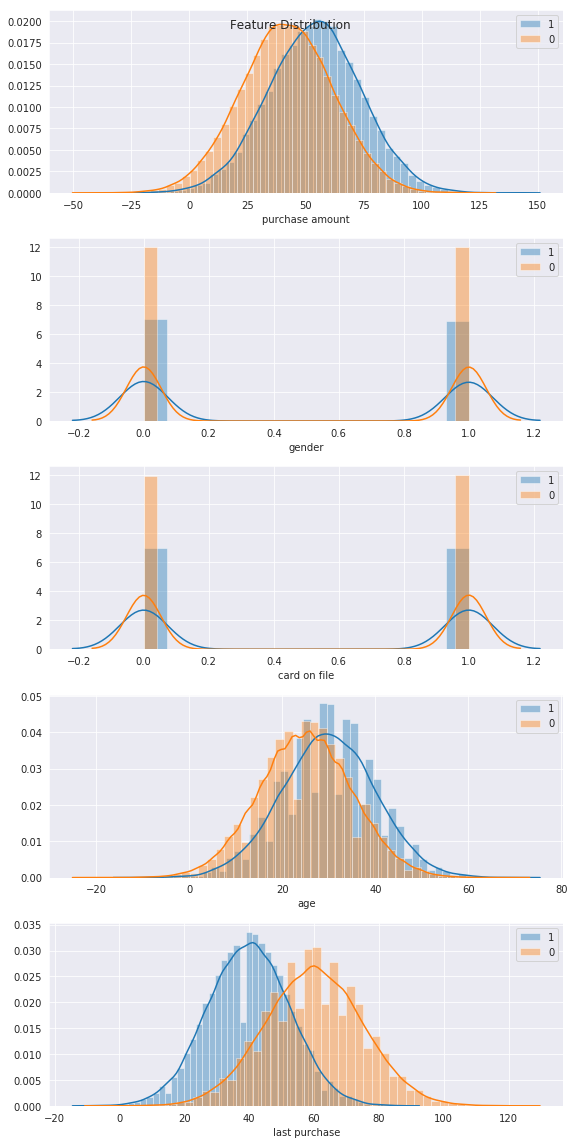

In [11]:
# plot target variable
fig, axes = plt.subplots(5, figsize=(8,16))

sns.distplot(df["purch_amt"].loc[df["loyalty"]==1], ax=axes[0], label=1)
sns.distplot(df["purch_amt"].loc[df["loyalty"]==0], ax=axes[0], label=0)
axes[0].set_xlabel("purchase amount")
axes[0].legend()

sns.distplot(df["gender"].loc[df["loyalty"]==1], ax=axes[1], label=1)
sns.distplot(df["gender"].loc[df["loyalty"]==0], ax=axes[1], label=0)
axes[1].set_xlabel("gender")
axes[1].legend()

sns.distplot(df["card_on_file"].loc[df["loyalty"]==1], ax=axes[2], label=1)
sns.distplot(df["card_on_file"].loc[df["loyalty"]==0], ax=axes[2], label=0)
axes[2].set_xlabel("card on file")
axes[2].legend()

sns.distplot(df["age"].loc[df["loyalty"]==1], ax=axes[3], label=1)
sns.distplot(df["age"].loc[df["loyalty"]==0], ax=axes[3], label=0)
axes[3].set_xlabel("age")
axes[3].legend()

sns.distplot(df["days_since_last_purch"].loc[df["loyalty"]==1], ax=axes[4], label=1)
sns.distplot(df["days_since_last_purch"].loc[df["loyalty"]==0], ax=axes[4], label=0)
axes[4].set_xlabel("last purchase")
axes[4].legend()

fig.suptitle("Feature Distribution")
plt.tight_layout()
plt.show;

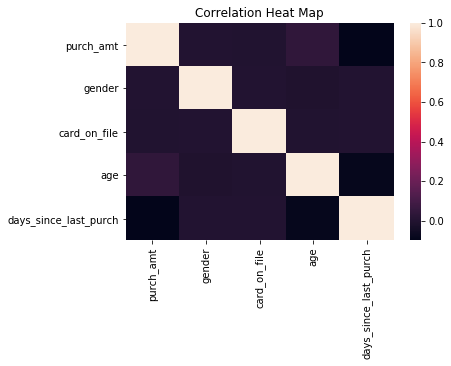

In [38]:
# plot a heatmap
sns.heatmap(df.drop("loyalty", axis=1).corr())
plt.title('Correlation Heat Map')
plt.show()

## Data Preprocessing

In [0]:
data = df.drop("loyalty", axis=1)
target = df["loyalty"]
features = [c for c in data.columns]

### Balance Target Variable

In [19]:
print('Target variable count:', target.sum())
print('Total observations:', len(target))
print('Target class:', target.sum()/len(target)*100, '%')

Target variable count: 20000
Total observations: 120000
Target class: 16.666666666666664 %


In [20]:
#
data_raw = data.copy()
target_raw = target.copy()

#
from imblearn import over_sampling as os
sm = os.SMOTE(random_state=42)
data, target = sm.fit_sample(data, target.ravel())
data = pd.DataFrame(data, columns=features)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


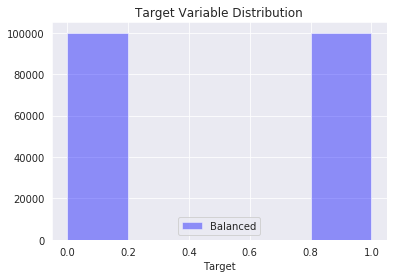

In [21]:
plt.figure(figsize=(6,4))
plt.title("Target Variable Distribution")
sns.distplot(target, color="blue", kde=False,bins=5, label='Balanced')
plt.legend()
plt.xlabel('Target')
plt.show()

### Scale Data

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=features)

## Supervised Model Selection

In [0]:
# define dataframes to store results
model_desc = []
model_score = pd.DataFrame()

# define supervised modeling function
def supervised_clf(model, data, target, test_size=0.25, stratify=True, cv=5,
                   show_plot=False):
  """
  """
  # split data #################################################################
  #from sklearn.model_selection import train_test_split, cross_val_score
  if stratify==True:
    X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=test_size, stratify=target)
  else:
    X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=test_size)
  
  # fit model ##################################################################
  model = model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  print('\nTraining score:', train_score)
  print('\nValidation score:', test_score)
  
  # cross validate #############################################################
  cv_scores = cross_val_score(model, data, target, cv=cv)
  cv_mean = np.round(np.mean(cv_scores), 4)
  variance = np.round(np.std(cv_scores)*2, 4)
  print('\nCross validation: {} +/- {}\n'.format(cv_mean, variance))
  
  if show_plot==True:
    plt.figure(figsize=(8,4))
    sns.lineplot(data=cv_scores)
    plt.xlabel("Iterations")
    plt.xticks(np.arange(0, cv))
    plt.ylabel("Accuracy")
    plt.title("Cross Validation")
    plt.show();
  
  # store results ##############################################################
  vals = [train_score, test_score, cv_mean, variance]
  cols = ["train_score", "test_score", "cv_score", "variance"]
  return pd.DataFrame([vals], columns=cols)

In [9]:
#from sklearn.linear_model import LogisticRegression
lasso = LogisticRegression(penalty='l1', solver="liblinear")

model_desc.append("lasso")
print("Model: {}".format(model_desc[-1]))

new_score = supervised_clf(model=lasso,
                           data=data,
                           target=target)
model_score = model_score.append(new_score, ignore_index=True)

Model: lasso

Training score: 0.79682

Validation score: 0.79704

Cross validation: 0.7969 +/- 0.0016



In [10]:
#from sklearn.linear_model import LogisticRegression
ridge = LogisticRegression(penalty='l2', solver="liblinear")
model_desc.append("ridge")
print("Model: {}".format(model_desc[-1]))

new_score = supervised_clf(model=ridge,
                           data=data,
                           target=target)
model_score = model_score.append(new_score, ignore_index=True)

Model: ridge

Training score: 0.7967933333333334

Validation score: 0.79652

Cross validation: 0.7969 +/- 0.0016



In [11]:
#from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
model_desc.append("naive_bayes")
print("Model: {}".format(model_desc[-1]))

new_score = supervised_clf(model=NB,
                           data=data,
                           target=target)
model_score = model_score.append(new_score, ignore_index=True)

Model: naive_bayes

Training score: 0.59706

Validation score: 0.59158

Cross validation: 0.5957 +/- 0.0973



In [12]:
#from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
model_desc.append("decision tree")
print("Model: {}".format(model_desc[-1]))

new_score = supervised_clf(model=tree,
                           data=data,
                           target=target)
model_score = model_score.append(new_score, ignore_index=True)

Model: decision tree

Training score: 0.9999266666666666

Validation score: 0.87486

Cross validation: 0.8689 +/- 0.1746



In [13]:
#from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
model_desc.append("random forest")
print("Model: {}".format(model_desc[-1]))

new_score = supervised_clf(model=rfc,
                           data=data,
                           target=target)
model_score = model_score.append(new_score, ignore_index=True)

Model: random forest

Training score: 0.9999133333333333

Validation score: 0.909

Cross validation: 0.9024 +/- 0.1727



In [14]:
#from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.1)
model_desc.append("gradient boosting")
print("Model: {}".format(model_desc[-1]))

new_score = supervised_clf(model=gbc,
                           data=data,
                           target=target)
model_score = model_score.append(new_score, ignore_index=True)

Model: gradient boosting

Training score: 0.87088

Validation score: 0.87096

Cross validation: 0.8624 +/- 0.1193



### Assessment

In [15]:
model_score[["cv_score", "variance"]].describe()

,cv_score,variance
count,6.000000,6.000000
mean,0.803867,0.094517
std,0.110268,0.077994
min,0.595700,0.001600
25%,0.796900,0.025525
50%,0.829650,0.108300
75%,0.867275,0.159350
max,0.902400,0.174600


In [16]:
model_score = pd.concat([pd.Series(model_desc, name="model"), model_score], axis=1)
model_score.sort_values(by=["cv_score"], ascending=False).head(5)

,model,train_score,test_score,cv_score,variance
4,random forest,0.999913,0.90900,0.9024,0.1727
3,decision tree,0.999927,0.87486,0.8689,0.1746
5,gradient boosting,0.870880,0.87096,0.8624,0.1193
0,lasso,0.796820,0.79704,0.7969,0.0016
1,ridge,0.796793,0.79652,0.7969,0.0016


## Neural Net

In [0]:
def get_neural_network(data, node_list=[4,1], act_list=['relu', 'sigmoid'],
                       optimizer="adam", loss="binary_crossentropy",
                       metric_list=["accuracy"]):
  """
  """
  #  create neural network #####################################################
  from keras import Sequential
  from keras.layers import Dense
  model = Sequential()
  model.add(Dense(node_list[0], input_dim=data.shape[1], activation=act_list[0]))
  model.add(Dense(node_list[0], activation=act_list[0]))
  model.add(Dense(node_list[1], activation=act_list[1]))
  # Compile model ##############################################################
  model.compile(loss=loss, optimizer=optimizer, metrics=metric_list)

  return model

In [0]:
def get_ANN_clf(model, data, target, # data input
                test_size=0.25, stratify=True, cv=5, # split parameters
                batch_size=10, epochs=100, verbose=0, # training parameters
                show_scores=True
               ):
  """
  """
  # split data #################################################################
  #from sklearn.model_selection import train_test_split
  if stratify==True:
    X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=test_size, stratify=target)
  else:
    X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=test_size)
  
  # Train network ############################################################## 
  model.fit(X_train, y_train,
            batch_size=batch_size, epochs=epochs, verbose=verbose,
            validation_split=0.33)
  
  if show_scores==True:
    train_eval = model.evaluate(X_train, y_train)
    print("\nTraining accuracy: {}".format(train_eval[1]))

    test_eval = model.evaluate(X_train, y_train)
    print("\nTest accuracy: {}".format(test_eval[1]))
  
  return model

In [95]:
model = get_neural_network(data)
model = get_ANN_clf(model, data, target, verbose=1)

Using TensorFlow backend.
W0721 01:49:46.393938 140591851644800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 01:49:46.429419 140591851644800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 01:49:46.439208 140591851644800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 01:49:46.487305 140591851644800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 01:49:46.511209 14059185

Train on 100499 samples, validate on 49501 samples
Epoch 1/100
100499/100499 [==============================] - 14s 140us/step - loss: 0.4211 - acc: 0.8111 - val_loss: 0.3916 - val_acc: 0.8195
Epoch 2/100
100499/100499 [==============================] - 13s 129us/step - loss: 0.3854 - acc: 0.8235 - val_loss: 0.3831 - val_acc: 0.8241
Epoch 3/100
100499/100499 [==============================] - 13s 128us/step - loss: 0.3791 - acc: 0.8245 - val_loss: 0.3790 - val_acc: 0.8240
Epoch 4/100
100499/100499 [==============================] - 13s 127us/step - loss: 0.3756 - acc: 0.8259 - val_loss: 0.3778 - val_acc: 0.8235
Epoch 5/100
100499/100499 [==============================] - 13s 129us/step - loss: 0.3733 - acc: 0.8263 - val_loss: 0.3820 - val_acc: 0.8251
Epoch 6/100
100499/100499 [==============================] - 13s 128us/step - loss: 0.3721 - acc: 0.8270 - val_loss: 0.3721 - val_acc: 0.8273
Epoch 7/100
100499/100499 [==============================] - 13s 127us/step - loss: 0.3708 - acc:

## Final Model

### Model Tuning

In [12]:
#from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier(n_estimators=100).get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [0]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
warm_start = [True, False]

param_grid = {'bootstrap': bootstrap,
              'max_depth': max_depth,
              'max_features': max_features,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'n_estimators': n_estimators,
              'warm_start': warm_start}

In [0]:
# split data
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.25, stratify=target)

# sample data for parameter search
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_train, y_train, test_size=0.5, stratify=y_train)

In [17]:
%%time
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()

search = RandomizedSearchCV(model, param_grid, n_iter=100, cv=3, verbose=2, n_jobs=-1)

search.fit(X_train_sample, y_train_sample)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 59.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 120.1min finished


CPU times: user 1min 47s, sys: 916 ms, total: 1min 47s
Wall time: 2h 1min 48s


In [18]:
best_params = search.best_params_
print(best_params)

{'warm_start': False, 'n_estimators': 752, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 35, 'bootstrap': False}


### Fit Model

In [0]:
# hard code best parameters
best_params = {'warm_start': False,
               'n_estimators': 752,
               'min_samples_split': 10,
               'min_samples_leaf': 1,
               'max_features': 'sqrt',
               'max_depth': 35,
               'bootstrap': False}


Training score: 0.98496

Validation score: 0.91116

Cross validation: 0.9012 +/- 0.1859



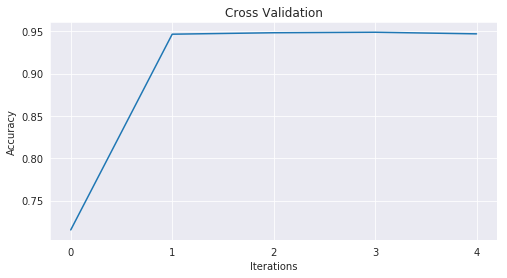

In [25]:
model = RandomForestClassifier(**best_params)
supervised_clf(model, data, target, show_plot=True)
y_pred = model.predict(data)

In [0]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

#
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall: 95.66%
Precision: 95.7443470416348%


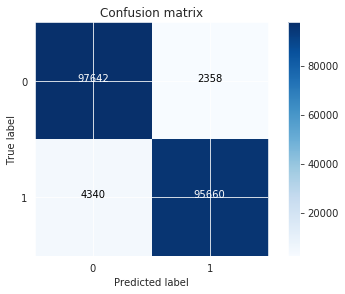

In [27]:
cnf_matrix = confusion_matrix(target, y_pred)

recall_metric = 100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall: {}%".format(recall_metric))

precision_metric = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision: {}%".format(precision_metric))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

ROC-AUC: 0.967


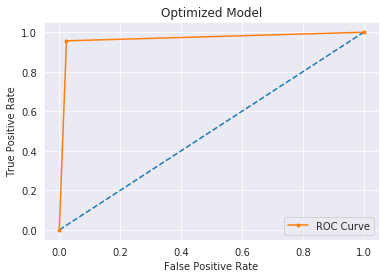

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate AUC
roc_auc = roc_auc_score(target, y_pred)
print('ROC-AUC: %.3f' % roc_auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(target, y_pred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.title('Optimized Model')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

f1=0.966 auc=0.977 ap=0.955


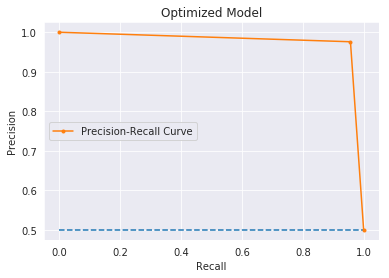

In [29]:
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.metrics import auc, average_precision_score

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(target, y_pred)
# calculate F1 score
f1_score = f1_score(target, y_pred)
# calculate precision-recall AUC
precision_recall_auc = auc(recall, precision)
# calculate average precision score
avg_precision = average_precision_score(target, y_pred)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1_score,
                                    precision_recall_auc,
                                    avg_precision))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title('Optimized Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

### featutre importance

In [31]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier(n_estimators=100)
model.fit(data, target)
selector = RFE(model)
selector = selector.fit(data, target)
rankings = pd.DataFrame({'features' : data.columns, 'rank' : selector.ranking_})
rankings.sort_values('rank')

,features,rank
0,purch_amt,1
4,days_since_last_purch,1
3,age,2
2,card_on_file,3
1,gender,4


## Conclusion

The modeling process was a success. The data required very little cleaning, only balancing the target variable.
All of the supervised models performed well using out-of-the-box parameters and achieved an accuracy scores ~80%.
The neural network achieved a similar accuracy, but wasn't the strongest model.
Of all the models, the best performing one was the Randon Forest Classifier.
After parameter tuning the final model achieved an accuracy of `0.9012 +/- 0.1859`.

After modeling, we ranked feature by importance. We determined that two of the most important features in predicting customers joing the loyalty program are purchase amount and days since last purchase.